<a href="https://colab.research.google.com/github/vidyashankarappa/MLCode/blob/main/PCA6AML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sns.set(
    { "figure.figsize": (6, 4) }, style='ticks', color_codes=True, font_scale=0.8
)

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.inspection import PartialDependenceDisplay, partial_dependence
from sklearn.metrics import mean_absolute_error

import shap
shap.initjs()
from sklearn.datasets import make_regression

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [ ]:
metadata = breast_cancer_wisconsin_diagnostic.metadata
id = None
name = None
if not id:
    id = metadata['uci_id']
elif not name:
    name = metadata['name']

data_url = metadata['data_url']

In [ ]:
cancer = pd.read_csv(data_url)

In [ ]:
cancer.head(3)

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,842302,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M


In [ ]:
cancer['Diagnosis'] = cancer['Diagnosis'].map({'B': 0, 'M': 1}).astype(np.float64)

In [ ]:
X = cancer.drop('Diagnosis', axis=1) # Assuming 'diagnosis' is the target column name
y = cancer['Diagnosis']

In [ ]:
df = pd.DataFrame(X, columns=X.columns) # Use X.columns to get column names
df['Diagnosis'] = y

In [ ]:
df.head(10)

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1.0
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1.0
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1.0
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1.0
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1.0
5,843786,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,1.0
6,844359,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,1.0
7,84458202,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,1.0
8,844981,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,1.0
9,84501001,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,1.0


In [ ]:
#y = cancer['Diagnosis'].map({'B': 0, 'M': 1})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   radius1             569 non-null    float64
 2   texture1            569 non-null    float64
 3   perimeter1          569 non-null    float64
 4   area1               569 non-null    float64
 5   smoothness1         569 non-null    float64
 6   compactness1        569 non-null    float64
 7   concavity1          569 non-null    float64
 8   concave_points1     569 non-null    float64
 9   symmetry1           569 non-null    float64
 10  fractal_dimension1  569 non-null    float64
 11  radius2             569 non-null    float64
 12  texture2            569 non-null    float64
 13  perimeter2          569 non-null    float64
 14  area2               569 non-null    float64
 15  smoothness2         569 non-null    float64
 16  compactn

In [ ]:
# standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# let us now check the mean and variance of the scaled data
print("Mean:", np.mean(X_scaled, axis=0))
print("Variance:", np.var(X_scaled, axis=0))

Mean: [ 1.24875700e-17 -1.37363271e-16  6.86816353e-17 -1.24875700e-16
 -2.18532476e-16 -8.36667193e-16  1.87313551e-16  4.99502802e-17
 -4.99502802e-17  1.74825981e-16  4.74527662e-16  2.37263831e-16
 -1.12388130e-16 -1.12388130e-16 -1.31119486e-16 -1.52972733e-16
  1.74825981e-16  1.62338411e-16  0.00000000e+00  8.74129903e-17
 -6.24378502e-18 -8.24179623e-16  1.24875700e-17 -3.74627101e-16
  0.00000000e+00 -2.37263831e-16 -3.37164391e-16  7.49254203e-17
  2.24776261e-16  2.62238971e-16 -5.74428222e-16]
Variance: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1.]


#Apply PCA


In [ ]:
# now apply PCA using the library fucntion, However, as instructed in lecture, you may try without library function too
pca_full = PCA(n_components=None)
X_pca_full = pca_full.fit_transform(X_scaled)

In [ ]:
# get explained variance for each component
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

In [ ]:
# print explained variance
print("Explained variance for 30 components:")
for i, (ev, cv) in enumerate(zip(explained_variance, cumulative_variance), 1):
    print(f"PC{i}: {ev:.3f} (Cumulative: {cv:.3f})")

Explained variance for 30 components:
PC1: 0.429 (Cumulative: 0.429)
PC2: 0.184 (Cumulative: 0.612)
PC3: 0.091 (Cumulative: 0.704)
PC4: 0.064 (Cumulative: 0.768)
PC5: 0.053 (Cumulative: 0.821)
PC6: 0.040 (Cumulative: 0.861)
PC7: 0.032 (Cumulative: 0.892)
PC8: 0.022 (Cumulative: 0.914)
PC9: 0.015 (Cumulative: 0.929)
PC10: 0.013 (Cumulative: 0.942)
PC11: 0.011 (Cumulative: 0.953)
PC12: 0.009 (Cumulative: 0.963)
PC13: 0.008 (Cumulative: 0.971)
PC14: 0.008 (Cumulative: 0.979)
PC15: 0.005 (Cumulative: 0.984)
PC16: 0.003 (Cumulative: 0.987)
PC17: 0.003 (Cumulative: 0.990)
PC18: 0.002 (Cumulative: 0.991)
PC19: 0.002 (Cumulative: 0.993)
PC20: 0.002 (Cumulative: 0.995)
PC21: 0.001 (Cumulative: 0.996)
PC22: 0.001 (Cumulative: 0.997)
PC23: 0.001 (Cumulative: 0.998)
PC24: 0.001 (Cumulative: 0.998)
PC25: 0.001 (Cumulative: 0.999)
PC26: 0.000 (Cumulative: 0.999)
PC27: 0.000 (Cumulative: 1.000)
PC28: 0.000 (Cumulative: 1.000)
PC29: 0.000 (Cumulative: 1.000)
PC30: 0.000 (Cumulative: 1.000)
PC31: 0.000

In [ ]:
# Assuming X_pca_full contains the principal components
PC1 = pd.DataFrame(X_pca_full[:, 0], columns=['PC1'])  # Extract first principal component

PC1.head()

,PC1
0,9.183200
1,2.383298
2,5.742472
3,7.124384
4,3.945694


In [ ]:
loadings = pca_full.components_

# Create a DataFrame for better visualization (optional)
loadings_df = pd.DataFrame(loadings, columns=X.columns) # X.columns represents your original feature names

# Display the loadings DataFrame
print(loadings_df)


          ID   radius1  texture1  perimeter1     area1  smoothness1  \
0   0.022912  0.218913  0.103844    0.227535  0.221046     0.142415   
1  -0.034068 -0.233271 -0.060044   -0.214589 -0.230669     0.186422   
2   0.096938 -0.011394  0.066892   -0.012125  0.026293    -0.103182   
3   0.026598 -0.042188  0.602954   -0.042753 -0.054115    -0.158098   
4   0.011328 -0.038130  0.049091   -0.037716 -0.010562     0.365750   
5  -0.316733  0.029589 -0.031394    0.028394  0.006113    -0.262509   
6   0.907116 -0.042299  0.014994   -0.043589 -0.028926    -0.140340   
7  -0.096362 -0.116427  0.001875   -0.106272 -0.047415    -0.123541   
8  -0.149116  0.046271  0.088727    0.036231  0.080650    -0.278996   
9  -0.169268 -0.224027  0.119457   -0.226345 -0.186004    -0.061338   
10 -0.058189  0.079466  0.253258    0.069866  0.062795    -0.084662   
11  0.006721  0.042214 -0.304032    0.017573  0.110760    -0.135322   
12  0.004841 -0.050604 -0.256274   -0.038470 -0.065048    -0.315872   
13 -0.

#reduction to 1d

In [ ]:
pca_1d = PCA(n_components=1)
X_pca_1d = pca_1d.fit_transform(X_scaled)


df_pca_1d = pd.DataFrame(X_pca_1d, columns=['PC1'])
df_pca_1d['Diagnosis'] = y

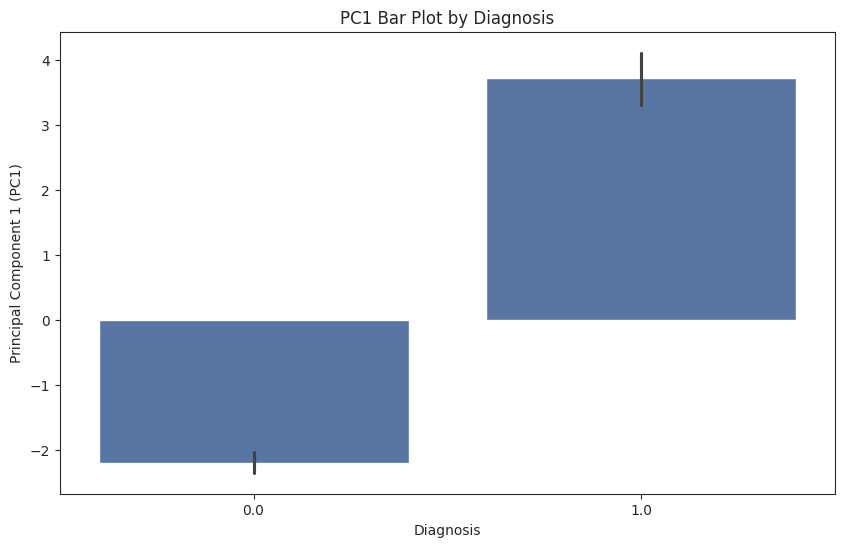

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_pca_1d, x='Diagnosis', y='PC1')
plt.xlabel('Diagnosis')
plt.ylabel('Principal Component 1 (PC1)')
plt.title('PC1 Bar Plot by Diagnosis')
plt.show()

In [ ]:
PC1 = pd.DataFrame(X_pca_full[:, 0], columns=['PC1'])

In [ ]:
model = LinearRegression() # Create an instance of the model
model.fit(PC1[['PC1']], y)

LinearRegression()

In [ ]:
model.fit(PC1[['PC1']], y) # Use PC1 as input features, 'y' is your target variable

LinearRegression()

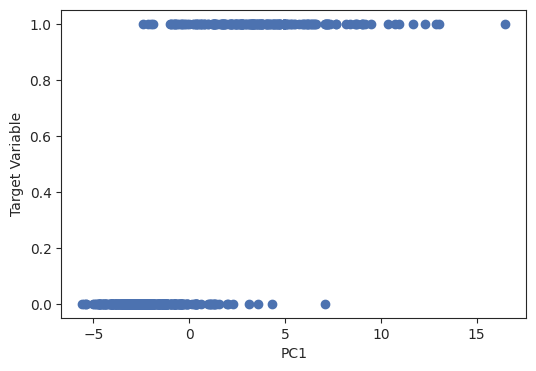

In [ ]:
plt.scatter(PC1['PC1'], y)
plt.xlabel('PC1')
plt.ylabel('Target Variable')
plt.show()

In [ ]:
reduced_df = pd.DataFrame({'PC1': PC1['PC1'], 'Diagnosis': y})

In [ ]:
reduced_df.head(3)

,PC1,Diagnosis
0,9.183200,1.0
1,2.383298,1.0
2,5.742472,1.0


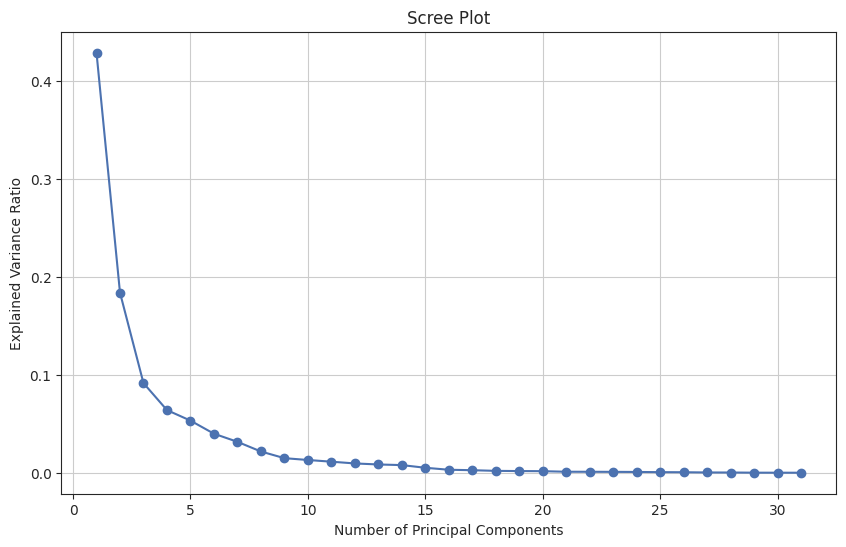

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='b')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

#plot

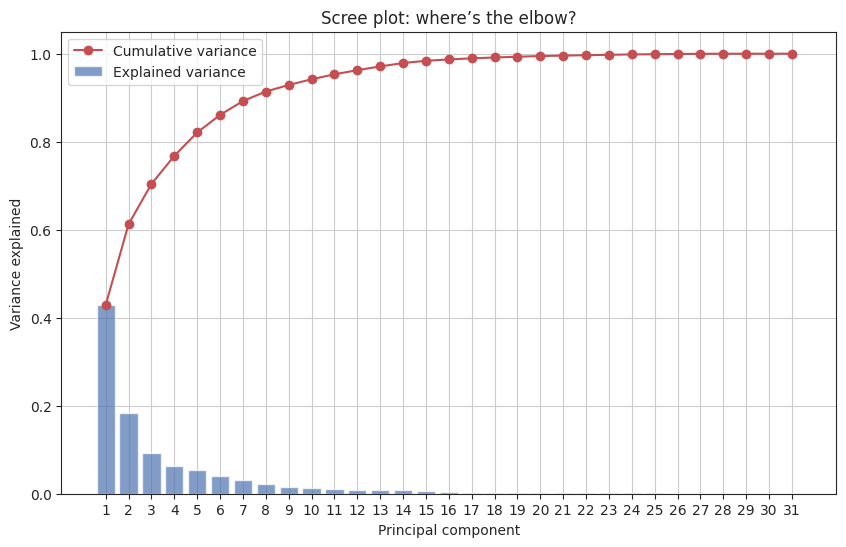

In [ ]:
plt.figure(figsize=(10, 6))
# Adjust the x-axis range to match the number of principal components
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Explained variance')
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, 'ro-', label='Cumulative variance')
plt.xlabel('Principal component')
plt.ylabel('Variance explained')
plt.title('Scree plot: where’s the elbow?')
# Adjust the x-axis ticks to match the number of principal components
plt.xticks(range(1, len(explained_variance) + 1))
plt.legend()
plt.grid(True)
plt.show()

#Project data onto 2 components (just for visualization)

In [ ]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# create a DataFrame for plotting
df_pca = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
df_pca['Diagnosis'] = y

In [ ]:
df_pca.head(3)

,PC1,PC2,Diagnosis
0,9.183200,1.971271,1.0
1,2.383298,-3.753459,1.0
2,5.742472,-1.080350,1.0


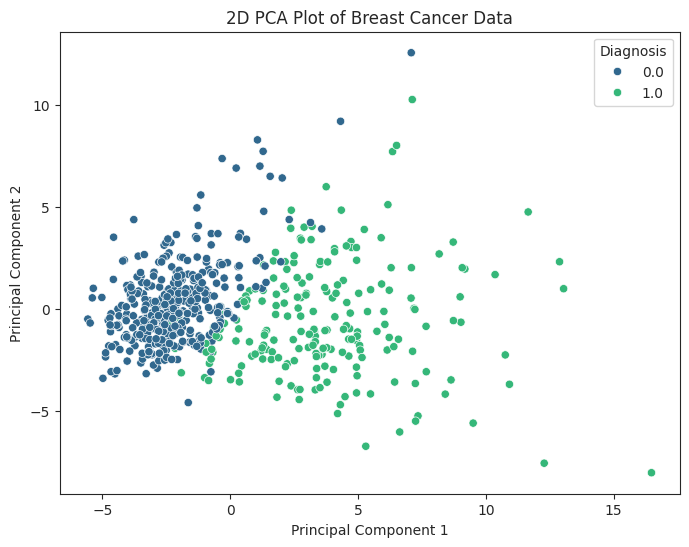

In [ ]:
# plotting the reduced data (plot the 2D projection)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Diagnosis', data=df_pca, palette='viridis')
plt.title('2D PCA Plot of Breast Cancer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

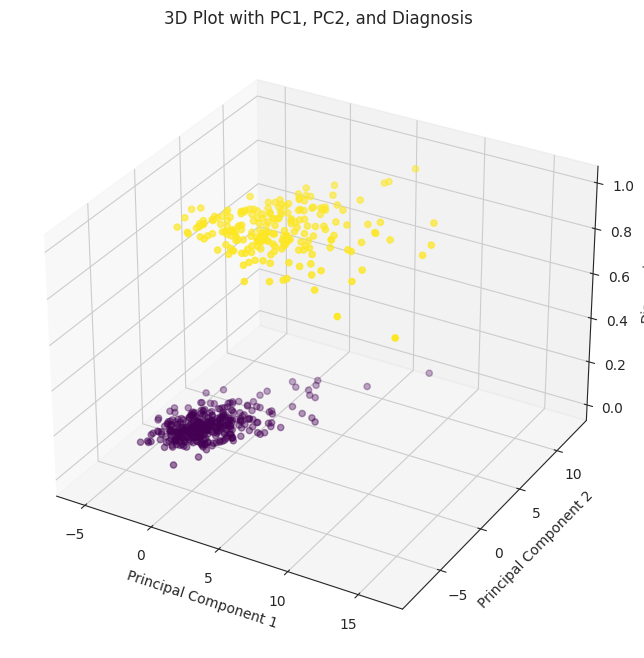

In [ ]:
# Extract PC1 and PC2
PC1_PC2 = pd.DataFrame(X_pca_full[:, :2], columns=['PC1', 'PC2'])

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Use PC1, PC2, and 'Diagnosis' as the x, y, and z coordinates respectively
ax.scatter(PC1_PC2['PC1'], PC1_PC2['PC2'], y, c=y, cmap='viridis')  # 'y' is your target variable

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Diagnosis')
plt.title('3D Plot with PC1, PC2, and Diagnosis')
plt.show()

#4 components

In [ ]:
pca_4d = PCA(n_components=4)
X_pca_4d = pca_4d.fit_transform(X_scaled)

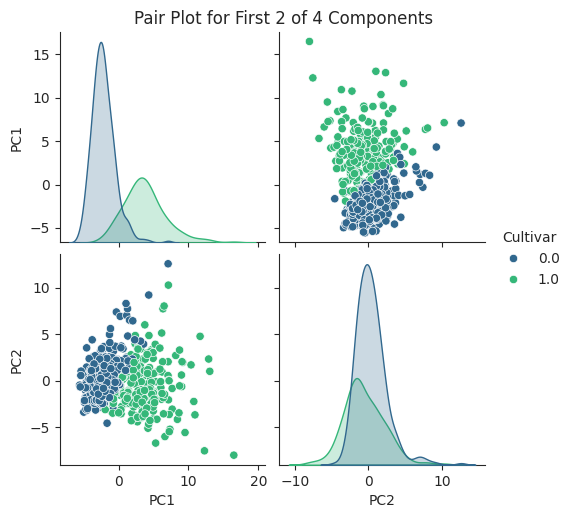

In [ ]:
# Pair plot for 4 components (subset for brevity)
df_pca_4d = pd.DataFrame(X_pca_4d[:, :2], columns=['PC1', 'PC2'])  # Just plot PC1 vs PC2
df_pca_4d['Cultivar'] = y
sns.pairplot(df_pca_4d, hue='Cultivar', palette='viridis')
plt.suptitle('Pair Plot for First 2 of 4 Components', y=1.02)
plt.show()

#Reconstruct the data

In [ ]:
X_reconstructed = pca_full.inverse_transform(X_pca_full)
X_original_reconstructed = scaler.inverse_transform(X_reconstructed)

In [ ]:
df_pca_reconstructed = pd.DataFrame(X_original_reconstructed, columns=X.columns)

In [ ]:
df_pca.head(3)

,PC1,PC2,Diagnosis
0,9.183200,1.971271,1.0
1,2.383298,-3.753459,1.0
2,5.742472,-1.080350,1.0


In [ ]:
df_pca_reconstructed.head(3)

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302.0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517.0,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903.0,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
